# Noise Budget Adventure

In [1]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
from pypulse.singlepulse import SinglePulse
import libstempo as T
import libstempo.plot as LP
from helpers import *

## Introduction

Pulses that travel through the ISM are subject to a number of effects, all of which can ultimately change the estimated times-of-arrival (TOAs) and affect any other signal we are trying to detect. The biggest effect is from the integral of electron density along the line of sight, known as the dispersion measure (DM). The DM induces a frequency-dependent delay on pulse arrivals that changes with time. The intrinsic emission of the pulsar, assumed to be stationary with time, also has a frequency-dependent effect on TOAs, and separating the two can often be a challenge. Other ISM effects, such as scintillation and scattering, also play an important role.

In this exercise, you will be working towards how we estimate DM, what kind of effects scattering has on the TOA estimation, and how this contributes to the overall "noise budget" of our pulsars. Throughout, we will make the distinction between the pulse template and a pulse profile. The pulse template is a stationary waveform as a function of observing frequency. Many observed pulse profiles summed together will create the average template shape.

This notebook is built in python 3. There are a few subtle, practical differences between 2 and 3. The primary one that you might encounter is that print must be done as a function print() rather than a statement.

## Dispersion Measure

The most prominent effect on timing comes from pulses traveling through the cold, ionized plasma of the ISM. The index of refraction of the medium is frequency-dependent, resulting in lower frequencies arriving later at the telescope than higher frequencies. The amount of time that a signal will be shifted by is given by

$$t_{\mathrm{DM}} = 4.15~\mathrm{ms~\left(\frac{\nu}{GHz}\right)^{-2}\left(\frac{DM}{pc~cm^{-3}}\right)}$$

where DM is the dispersion measure, the integral of the electron number density along the line-of-sight, $\mathrm{DM} =\int_0^D n_e dl$, where $D$ is the distance from the Earth to the Pulsar. Because every frequency is shifted by an amount
given by the equation above, one can determine the DM by measuring the delay of two different frequencies

$$t_{\mathrm{DM}} = 4.15~\mathrm{ms~\left[\left(\frac{\nu_1}{GHz}\right)^{-2} - \left(\frac{\nu_2}{GHz}\right)^{-2}\right]\left(\frac{DM}{pc~cm^{-3}}\right)}$$

in the same units as above. Therefore, by measuring the times-of-arrival (TOAs) of pulses at two different frequencies, we can estimate what the dispersion measure is and remove the effect.

Below is a plot of two pulses observed at L band, one at 1.40 GHz and one at a nearby 1.39 GHz. You’ll
notice that the lower frequency pulse arrives slightly later than the higher frequency pulse. We set t = 0 to be the
when the maximum of the 1.40 GHz pulse arrives and plot the entire pulse phase.

Note: If you need to adjust the figure size, you can provide a tuple to the argument of dispersionPlot(), i.e.:

* dispersionPlot(1,(10,8)).   

By default, the second argument is the figure size and is set to (10,8)

And, if you need to do calculations, don't forget that you can completely manipulate the structures of this notebook. Add more cells!

/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


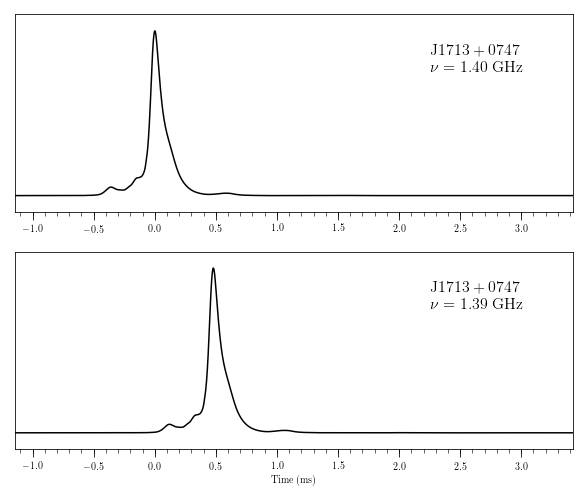

In [2]:
dispersionPlot(1,(10,8))

Estimate the DM for this observation.

In [3]:
# Some space for you to work

How precisely can you measure the TOA?

Can you come up with an estimate of the error in your DM measurement?

Let’s assume that the pulse profile is the same across all frequencies (not true!). Now we look at a much larger
frequency range, one pulse at 1.40 GHz and one at 150 MHz. As before, the maximum of the 1.40 GHz pulse has
been set to $t = 0$ and the pulses have been wrapped in phase.

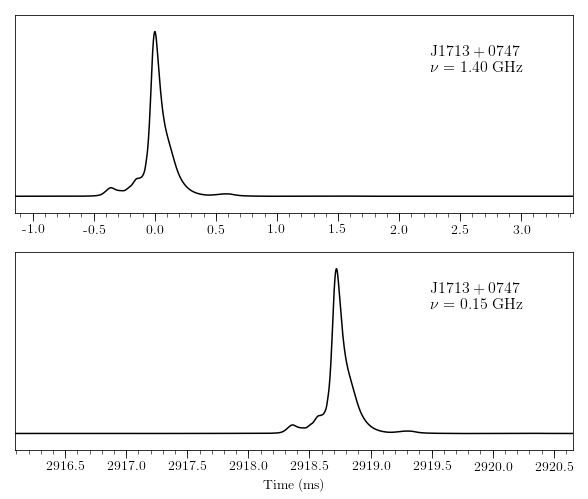

In [4]:
dispersionPlot(2)

The period of J1713+0747 is $P = 4.57$ ms. How many periods pass before the 150 MHz profile is observed?

In [5]:
# Some space for you to work

What is your estimate for the DM for this observation?

In [6]:
# Some space for you to work

Assuming that your TOA error is the same as previously, what is your estimate of the error in your DM measurement?

On another day, you observe the same pulsar again but notice the following data, shown below.

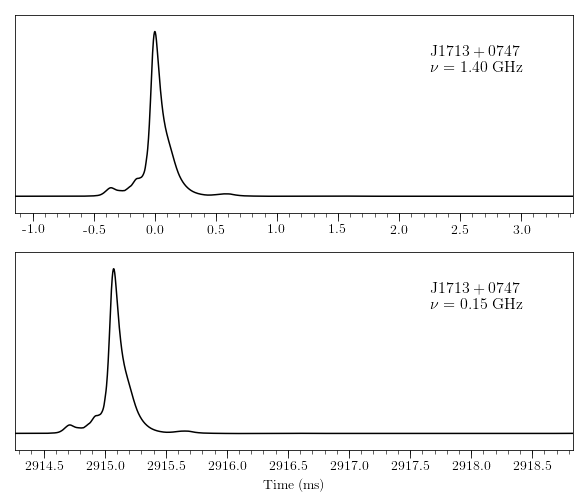

In [7]:
dispersionPlot(3)

What is your estimate for the DM for this observation?

In [8]:
# Some space for you to work

What happens to your TOA error when you add noise to these pulses? How does this affect your DM uncertainty?

Below is a plot of the derivative of DM with respect to time versus the value of the DM (Hobbs et al. 2004). You
can see a possible trend where higher DM pulsars, on average farther away in the galaxy, have absolute changes
in DM larger than lower DM pulsars. For high precision timing, we typically choose pulsars towards the left with
lower DM values often because they are closer, brighter, and therefore better timers.
![title](images/Hobbs+2004_fig9.png)

--------------------------

## Profile Evolution

Up to now, we have only considered a pulse template that does not change as a function of frequency. As such, we can use the same template to determine the TOA of any subset of data of a particular observing band. However, we know that pulsar emission is not the same across all frequencies but changes in components vary slowly as a function of frequency.

To look at profile evolution, we will use PyPulse. Note that for reference, you can use the PSRCHIVE pat command in very much the same way ("pat -t -f princeton -s [TEMPLATE] [PROFILE]")

We have written some helper functions for you to access PyPulse. All of the profiles are in the PE/ directory but do not need to be copied over. To demonstrate how the fitting works, we start with our pulsar having a single component. Use the load\_profile() function as below to load pulse data.

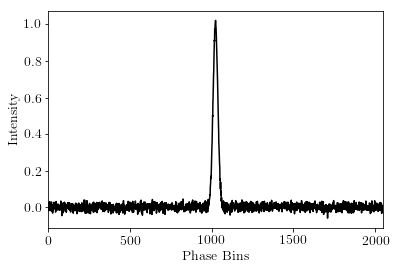

In [11]:
prof = load_profile("PE/single.ar") #helper function that returns a PyPulse SinglePulse object
prof.plot()

Now we will load the standard template (".std" extension). The fit\_plot() function is used to fit the template to the template to the profile. For now, we will ignore the return arguments.

(-0.8547831844329518, 1.002147538286932)

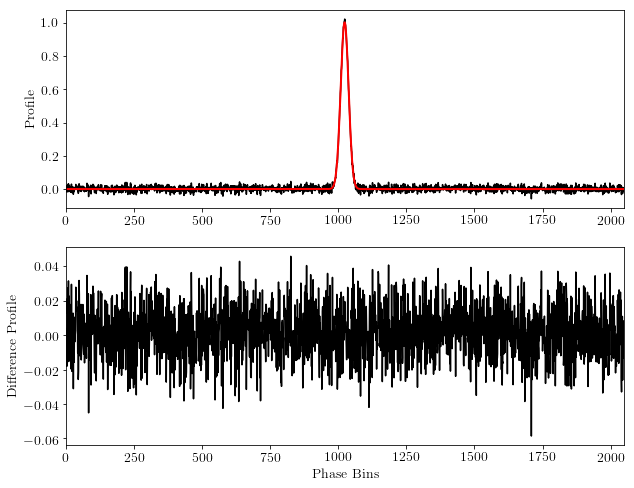

In [12]:
temp = load_profile("PE/single.std")
fit_plot(temp,prof,verbose=False)

For a template that ideally matches the data profile, the difference profile will be white noise in a scale that’s small
in comparison to the total flux of the data profile. How well does single.std fit single.ar?

When we observe our pulsar at lower frequencies, we notice that a smaller, second component appears in our pulse shape. Try to fit single.std to doublesmall.ar, our two-component observation. What do you notice about the TOA and the TOA error as compared to before? What do you notice about the difference profile? Why does it have the shape that it does? Does this make sense with the TOA value you are getting?

In [13]:
# Some space for you to work

After many observations, we try to build a new standard template, given in doublesmall.std. Now try to fit this template to doublesmall.ar. As before, what are the things that you notice? Pay attention to the difference profile shape, the TOA, and the TOA uncertainty.

In [14]:
# Some space for you to work

When we observe our pulsar at even lower frequencies, we notice that the smaller component becomes much larger and actually brighter than our primary component from earlier. Try to fit the doublemedium.std to doublelarge.ar and doublexlarge.ar. What’s going on with the shape now? What about the value (all digits!) of the TOA and the TOA uncertainty? Can you explain what’s going on? Think about how a computer might handle the calculation and what problems can arise if the pulses had a different shape, such as two components being closer together.

In [15]:
# Some space for you to work

--------------------------

## Interstellar Scattering and Pulse Shape Changes

For this last section, we will consider what happens to pulse shapes and the TOAs when pulses are scattered. Multi-path propagation through the ISM means that some parts of the pulse will arrive later than other parts. The effect will be something stretching out the pulse exponentially (convolving with an exponential). We will look at some toy examples.

First, let's build a profile. We can use the pulse() command, which takes an arbitrary time/phase axis and a width parameter, like below

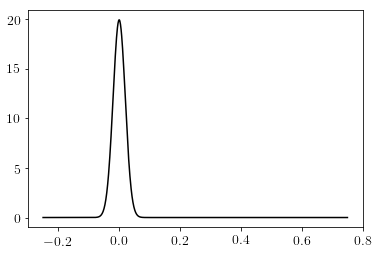

In [16]:
phase = np.linspace(-0.25,0.75,1000)
prof = pulse(phase,0.02)
plot(phase,prof,'k')

Now let's compare it to a scattered profile using the scattered_pulse() function, which takes one additional parameter: the scattering timescale.

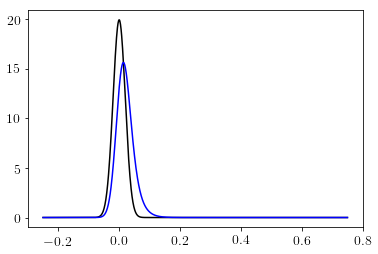

In [17]:
scprof = scattered_pulse(phase,0.02,0.02)
plot(phase,prof,'k')
plot(phase,scprof,'b')

Try adjusting the scattering timescale parameter in relation to the width parameter. What do you notice about the pulse shapes? How does the amplitude change? The width? The area? Where the peak falls? Be specific!

Now let's see how some fitting works. Let's make a template and add noise. You can use the scattered_pulse() function to make a template and then the addNoise() function, which takes a shape and adds noise. The second argument gives you the S/N ratio of the resultant pulse. Then we can fit the pulse as we did before. The two return values are printed as well as stored in the variables tauhat and bhat; they give the estimated phase offset (in bin units) and scale offset (which matches our arbitrary scaling).

<IPython.core.display.Math object>

<IPython.core.display.Math object>

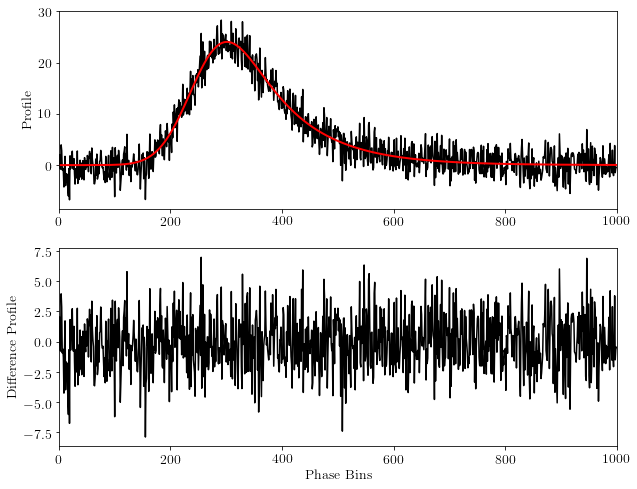

In [18]:
temp = scattered_pulse(phase,0.05,0.1)
prof = 5*add_noise(temp,10) #arbitrary scaling
tauhat,bhat = fit_plot(temp,prof)

What happens to the scale and offset parameters when you when you change the S/N ratio? Try rotating the profile around by small amounts using shiftit(profile,bins_to_shift) before running fitPlot(). What happens to the fit?

Now let's see what happens when different you have a template but profiles with different amounts of scattering

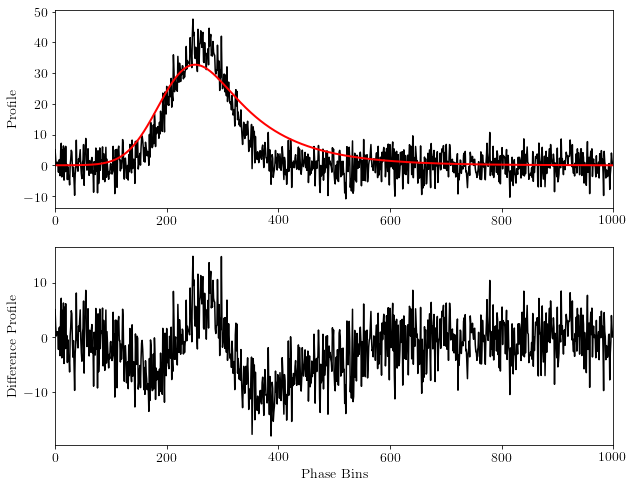

In [19]:
temp = scattered_pulse(phase,0.05,0.1)
prof = 5*add_noise(scattered_pulse(phase,0.05,0.01),10) #arbitrary scaling
tauhat,bhat = fit_plot(temp,prof,verbose=False) #turn off printing

How do the scale and offset parameters change as you change the amount of scattering?

In [20]:
# Some space for you to work

**Advanced:** The scattering timescale is proportional to $\nu^{-4.4}$ for a turbulent Kolmogorov medium. Can you simulate pulses and determine how the TOAs change with frequency? What about the pulse S/Ns? How might that also affect the TOA uncertainty?